#### Assignment 10 : Data Analytics III

#### 1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset.
#### 2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset

#### Data Preprocessing

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [23]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

#### 1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB #G must be capital here

X = np.asarray(df.drop(["Species"], axis = 1))
y = np.asarray(df["Species"])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

model = GaussianNB()

model.fit(X_train,y_train);

y_pred = model.predict(X_test)


#### 2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
cm = confusion_matrix(y_test,y_pred)
print("confusion Matrix : \n ", cm)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy : \n", accuracy)

TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

print(f" TN - {TN}, FP - {FP}, FN - {FN}, TP - {TP} ")

error_rate = 1 - accuracy;
print("Error rate : \n", error_rate)

precision = precision_score(y_test,y_pred, average='macro') #This average = 'macro' is imp when we have more than 2 * 2 matrix
print("Precision Score : \n", precision)

recall = recall_score(y_test,y_pred, average='macro')
print("Recall Score : \n", recall)

confusion Matrix : 
  [[19  0  0]
 [ 0 14  0]
 [ 0  0 12]]
Accuracy : 
 1.0
 TN - 19, FP - 0, FN - 0, TP - 14 
Error rate : 
 0.0
Precision Score : 
 1.0
Recall Score : 
 1.0


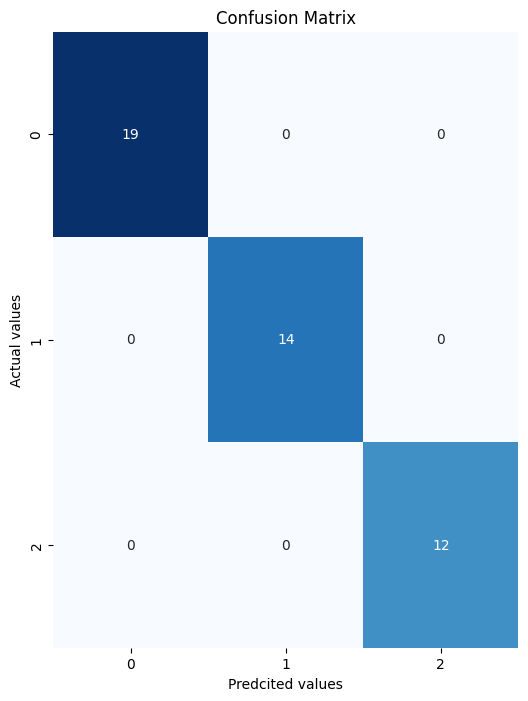

In [31]:
plt.figure(figsize = (6,8))
sns.heatmap(cm,annot = True,cmap = 'Blues', cbar = False)
plt.title("Confusion Matrix")
plt.xlabel("Predcited values")
plt.ylabel("Actual values")
plt.show()

In [34]:
df.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64